In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.rename(columns = {"Unnamed: 0" : "Index"}, inplace = True)

In [6]:
df["Index"] = df['Index'].astype(float)

In [7]:
df.corr()

,Index,TV,Radio,Newspaper,Sales
Index,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [8]:
from sklearn.model_selection import train_test_split
x=df[['TV','Radio','Newspaper']]
y=df['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.65, random_state=0)

In [9]:
models = [LinearRegression(), KNeighborsRegressor(n_neighbors = 3), DecisionTreeRegressor(), SVR(kernel = 'linear'), RandomForestRegressor()]

models

[LinearRegression(),
 KNeighborsRegressor(n_neighbors=3),
 DecisionTreeRegressor(),
 SVR(kernel='linear'),
 RandomForestRegressor()]

In [10]:
model1 = LinearRegression()
model1.fit(x_train,y_train)
Predict = model1.predict(x_test)
score = r2_score(y_test,Predict)*100
print(score)

87.1570930067359


In [11]:
model2 = KNeighborsRegressor(n_neighbors = 3)
model2.fit(x_train,y_train)
Predict = model2.predict(x_test)
score = r2_score(y_test,Predict)*100
print(score)

93.23701501954463


In [12]:
model3 = DecisionTreeRegressor()
model3.fit(x_train,y_train)
Predict = model3.predict(x_test)
score = r2_score(y_test,Predict)*100
print(score)

91.9464898335535


In [13]:
model4 = RandomForestRegressor()
model4.fit(x_train,y_train)
Predict = model4.predict(x_test)
score = r2_score(y_test,Predict)*100
print(score)

96.68610757727167


In [14]:
model5 = SVR(kernel = "linear")
model5.fit(x_train,y_train)
Predict = model5.predict(x_test)
score = r2_score(y_test,Predict)*100
print(score)

84.77988879673258


<AxesSubplot:>

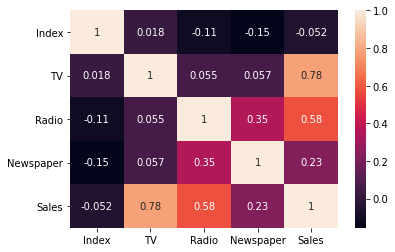

In [15]:
sns.heatmap(df.corr(),annot=True)

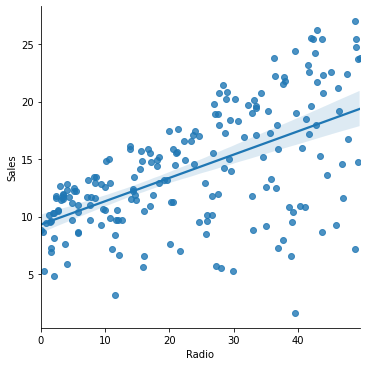

In [16]:
sns.lmplot(data=df,x='Radio',y="Sales")

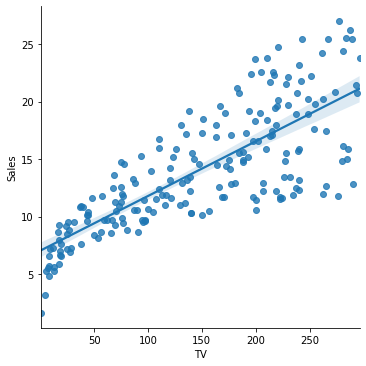

In [17]:

sns.lmplot(data=df,x='TV',y="Sales")
     